<a href="https://colab.research.google.com/github/amandasmagalhaes/analises/blob/main/EDA_PNAD_2015.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de Dados - PNAD 2015

## Variáveis:

*   UF
*   Sexo
*   Idade
*   Cor
*   Anos de Estudo
*   Renda
*   Altura

___

## **Bibliotecas**

In [152]:
# Dados
import pandas as pd
import numpy as np

# Gráficos
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

## **Banco de dados**
Os dados são provenientes da Pesquisa Nacional por Amostra de Domicílios (PNAD), realizada pelo Instituto Brasileiro de Geografia e Estatística (IBGE) em 2015.  
Dataset disponível em: https://www.kaggle.com/upadorprofzs/testes

In [153]:
df = pd.read_csv('https://raw.githubusercontent.com/amandasmagalhaes/analises/main/kagglepnad2015.csv')

In [154]:
df.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


## **Análise do banco**

In [155]:
df.shape

(76840, 7)

In [156]:
df.dtypes

UF                  int64
Sexo                int64
Idade               int64
Cor                 int64
Anos de Estudo      int64
Renda               int64
Altura            float64
dtype: object

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76840 entries, 0 to 76839
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UF              76840 non-null  int64  
 1   Sexo            76840 non-null  int64  
 2   Idade           76840 non-null  int64  
 3   Cor             76840 non-null  int64  
 4   Anos de Estudo  76840 non-null  int64  
 5   Renda           76840 non-null  int64  
 6   Altura          76840 non-null  float64
dtypes: float64(1), int64(6)
memory usage: 4.1 MB


In [158]:
df.describe().round(2)

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
count,76840.00,76840.00,76840.00,76840.00,76840.00,76840.00,76840.00
mean,31.91,0.31,44.07,5.03,9.47,2000.38,1.70
std,11.15,0.46,12.48,2.86,4.54,3323.39,0.08
min,11.00,0.00,13.00,0.00,1.00,0.00,1.34
25%,25.00,0.00,34.00,2.00,6.00,788.00,1.65
50%,31.00,0.00,43.00,4.00,11.00,1200.00,1.70
75%,41.00,1.00,53.00,8.00,12.00,2000.00,1.75
max,53.00,1.00,99.00,8.00,17.00,200000.00,2.03


### Verificando dados ausentes

In [159]:
df.isnull().sum()

UF                0
Sexo              0
Idade             0
Cor               0
Anos de Estudo    0
Renda             0
Altura            0
dtype: int64

In [160]:
df.isnull().values.any()

False

Se houvesse valores nulos, poderíamos imputar a média nos valores nulos da variável: df['x'].fillna(df['x'].mean(), inplace=True)

## **Tratamento e manipulação dos dados**

In [161]:
# Quantas categorias existem em cada coluna?

for col in df.columns:
  print(col, ":", len(df[col].unique()))

UF : 27
Sexo : 2
Idade : 84
Cor : 5
Anos de Estudo : 17
Renda : 1606
Altura : 76831


### Tratamento da variável categórica UF

In [162]:
# Atribuindo labels para as categorias da variável UF

Dict_UF = {
    11 : 'Rondônia',
    12 : 'Acre',
    13 : 'Amazonas',
    14 : 'Roraima',
    15 : 'Pará',
    16 : 'Amapá',
    17 : 'Tocantins',
    21 : 'Maranhão',
    22 : 'Piauí',
    23 : 'Ceará',
    24 : 'Rio Grande do Norte',
    25 : 'Paraíba',
    26 : 'Pernambuco',
    27 : 'Alagoas',
    28 : 'Sergipe',
    29 : 'Bahia',
    31 : 'Minas Gerais',
    32 : 'Espírito Santo',
    33 : 'Rio de Janeiro',
    35 : 'São Paulo',
    41 : 'Paraná',
    42 : 'Santa Catarina',
    43 : 'Rio Grande do Sul',
    50 : 'Mato Grosso do Sul',
    51 : 'Mato Grosso',
    52 : 'Goiás',
    53 : 'Distrito Federal'
}

df["UF"] = df["UF"].map(Dict_UF)

In [164]:
# Verificando se os labels foram atribuídos às categorias de UF

df.loc[2000:2005]

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
2000,Acre,0,44,8,13,4000,1.665312
2001,Acre,0,30,2,16,3000,1.690788
2002,Acre,0,59,8,1,900,1.903044
2003,Acre,0,48,8,12,2500,1.780344
2004,Acre,0,59,4,16,2500,1.691845
2005,Acre,1,43,8,16,2400,1.645096


### Tratamento da variável Sexo  

* Valor 0 é atribuído ao 'Masculino'
* Valor 1 é atribuído ao 'Feminino'

In [165]:
# Atribuindo labels para as categorias da variável Sexo

Dict_Sexo = {
    0 : 'Masculino',
    1 : 'Feminino'
}

df['Sexo'] = df['Sexo'].map(Dict_Sexo)

In [167]:
# Verificando se os labels foram atribuídos às categorias de Sexo

df.loc[3000:3005]

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
3000,Amazonas,Masculino,35,8,12,788,1.675308
3001,Amazonas,Masculino,27,8,3,1200,1.642058
3002,Amazonas,Masculino,21,8,10,2000,1.688241
3003,Amazonas,Feminino,46,8,16,0,1.762375
3004,Amazonas,Feminino,57,4,12,788,1.672420
3005,Amazonas,Masculino,32,8,12,900,1.751099


In [168]:
df.groupby('Sexo').mean().round(2)

,Idade,Cor,Anos de Estudo,Renda,Altura
Sexo,,,,,
Feminino,44.13,5.02,10.26,1566.85,1.7
Masculino,44.05,5.04,9.12,2192.44,1.7


### Tratamento da variável Idade

A variável Idade não exige alterações

### Tratamento da variável Cor

In [169]:
# Atribuindo labels para as categorias da variável Cor

Dict_Cor = {
    0 : 'Indígena',
    2 : 'Branca',
    4 : 'Preta',
    6 : 'Amarela',
    8 : 'Parda',
    9 : 'Sem declaração'
}

df['Cor'] = df['Cor'].map(Dict_Cor)

In [171]:
# Verificando se os labels foram atribuídos às categorias de Cor

df.loc[45000:45005]

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
45000,Rio de Janeiro,Masculino,36,Branca,12,3200,1.554542
45001,Rio de Janeiro,Masculino,38,Preta,12,1650,1.673025
45002,Rio de Janeiro,Masculino,24,Parda,9,1500,1.618131
45003,Rio de Janeiro,Masculino,45,Branca,16,2500,1.531065
45004,Rio de Janeiro,Masculino,66,Branca,9,1300,1.720447
45005,Rio de Janeiro,Masculino,25,Branca,11,1500,1.578968


In [172]:
df.groupby('Cor').mean().round(2)

,Idade,Anos de Estudo,Renda,Altura
Cor,,,,
Amarela,46.24,12.56,4182.92,1.7
Branca,45.04,10.49,2679.02,1.7
Indígena,42.90,8.22,1472.89,1.7
Parda,43.35,8.69,1513.60,1.7
Preta,43.43,8.86,1442.29,1.7


### Tratamento da variável Anos de Estudo

In [173]:
df['Anos de Estudo'].value_counts()

12    20848
16    10795
9      7980
5      6729
1      5849
6      4499
4      2891
8      2689
7      2445
11     2118
3      2101
10     1840
13     1836
15     1388
2      1388
14     1253
17      191
Name: Anos de Estudo, dtype: int64

In [174]:
Dict_Anos = {
    1 : 0,
    2 : 1,
    3 : 2,
    4 : 3,
    5 : 4,
    6 : 5,
    7 : 6,
    8 : 7,
    9 : 8,
    10 : 9,
    11 : 10,
    12 : 11,
    13 : 12,
    14 : 13,
    15 : 14,
    16 : 15,
    17 : 0
}

df['Anos de Estudo'] = df['Anos de Estudo'].map(Dict_Anos)

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76840 entries, 0 to 76839
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UF              76840 non-null  object 
 1   Sexo            76840 non-null  object 
 2   Idade           76840 non-null  int64  
 3   Cor             76840 non-null  object 
 4   Anos de Estudo  76840 non-null  int64  
 5   Renda           76840 non-null  int64  
 6   Altura          76840 non-null  float64
dtypes: float64(1), int64(3), object(3)
memory usage: 4.1+ MB


In [177]:
df.tail()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
76835,Distrito Federal,Feminino,46,Branca,10,812,1.687030
76836,Distrito Federal,Masculino,30,Preta,6,1500,1.792934
76837,Distrito Federal,Masculino,32,Parda,11,1300,1.830587
76838,Distrito Federal,Masculino,57,Parda,3,1500,1.726344
76839,Distrito Federal,Masculino,38,Parda,3,900,1.658305


### Tratamento da variável Renda
A variável Renda não exige alterações

### Tratamento da variável Altura

In [178]:
df['Altura'] = round(df['Altura'], 2)

In [179]:
df.loc[900:905]

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
900,Rondônia,Feminino,49,Parda,8,900,1.68
901,Rondônia,Feminino,40,Indígena,3,900,1.66
902,Rondônia,Feminino,44,Parda,4,700,1.72
903,Rondônia,Masculino,54,Parda,8,780,1.79
904,Rondônia,Feminino,53,Parda,8,788,1.76
905,Rondônia,Feminino,42,Parda,4,850,1.79


### Verificar os tipos de variáveis após os tratamentos

In [180]:
df.dtypes

UF                 object
Sexo               object
Idade               int64
Cor                object
Anos de Estudo      int64
Renda               int64
Altura            float64
dtype: object

## **Análise exploratória de dados**

### **Análise Univariada**

In [181]:
#Resumo das variáveis

df.columns

Index(['UF', 'Sexo', 'Idade', 'Cor', 'Anos de Estudo', 'Renda', 'Altura'], dtype='object')

### Análise da variável UF

In [182]:
df['UF'].value_counts()

São Paulo              8544
Minas Gerais           7686
Rio Grande do Sul      6322
Bahia                  5717
Rio de Janeiro         5556
Pará                   4449
Paraná                 4356
Pernambuco             3820
Goiás                  3478
Ceará                  3359
Santa Catarina         2275
Amazonas               2206
Distrito Federal       2054
Mato Grosso            1800
Maranhão               1787
Rondônia               1537
Espírito Santo         1511
Mato Grosso do Sul     1440
Tocantins              1306
Sergipe                1287
Paraíba                1274
Piauí                  1211
Rio Grande do Norte     973
Acre                    937
Alagoas                 903
Roraima                 540
Amapá                   512
Name: UF, dtype: int64

Text(0.5, 1.0, 'Total de pessoas por UF')

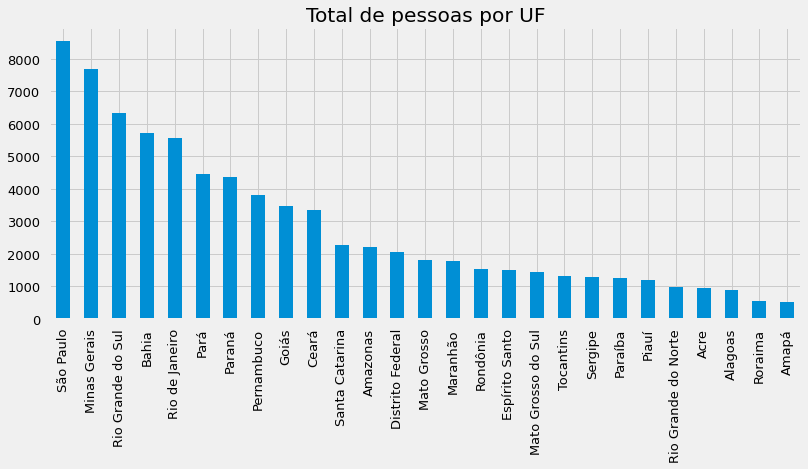

In [183]:
df['UF'].value_counts().plot(kind='bar', figsize = (12, 5))
plt.title('Total de pessoas por UF')

### Análise da variável Sexo

In [184]:
n = df.shape[0]
((df['Sexo'].value_counts()/n)*100).round(2)

Masculino    69.3
Feminino     30.7
Name: Sexo, dtype: float64

Text(0.5, 1.0, 'Frequência de pessoas por sexo (%)')

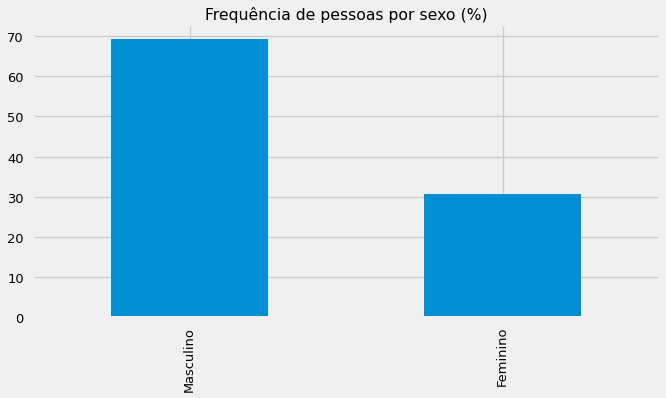

In [234]:
((df['Sexo'].value_counts()/n)*100).plot(kind = 'bar', figsize = (10, 5))
plt.title('Frequência de pessoas por sexo (%)')

### Análise da variável Idade

In [186]:
df['Idade'].value_counts()

40    2263
45    2250
37    2235
43    2213
35    2206
      ... 
14       1
99       1
97       1
95       1
94       1
Name: Idade, Length: 84, dtype: int64

Text(0.5, 1.0, 'Total de pessoas por idade')

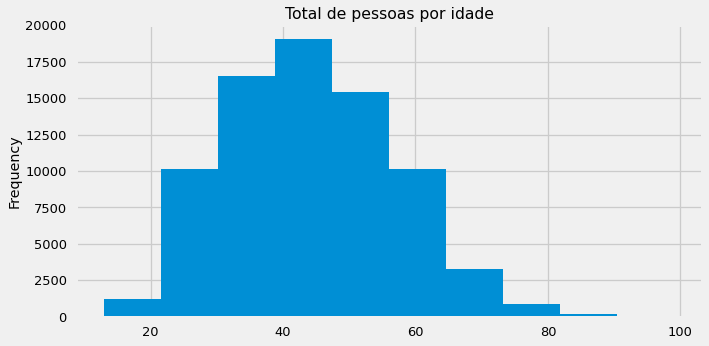

In [235]:
df['Idade'].plot(kind = 'hist', figsize = (10, 5))
plt.title('Total de pessoas por idade')

In [188]:
# Das 76840 observações, existem 423 que têm idade inferior a 20

len(df['Idade'][df['Idade'] < 20])

423

In [189]:
print('Idade máxima', df['Idade'].max())
print('Idade mínima', df['Idade'].min())

Idade máxima 99
Idade mínima 13


### Análise da variável Cor

In [190]:
n = df.shape[0]
((df['Cor'].value_counts()/n)*100).round(2)

Parda       46.75
Branca      41.40
Preta       10.92
Indígena     0.46
Amarela      0.46
Name: Cor, dtype: float64

Text(0.5, 1.0, 'Frequência de pessoas por cor (%)')

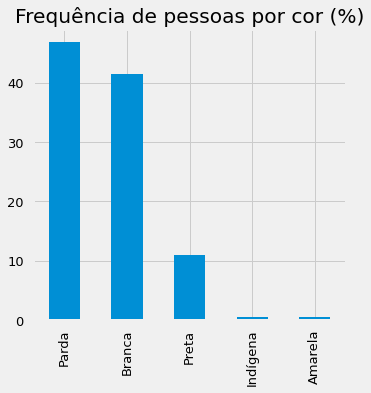

In [191]:
((df['Cor'].value_counts()/n)*100).plot(kind = 'bar', figsize = (5, 5))
plt.title('Frequência de pessoas por cor (%)')

### Análise da variável Anos de Estudo

In [240]:
(df['Anos de Estudo'].value_counts()).sort_values(ascending = False)

11    20848
15    10795
8      7980
4      6729
0      6040
5      4499
3      2891
7      2689
6      2445
10     2118
2      2101
9      1840
12     1836
14     1388
1      1388
13     1253
Name: Anos de Estudo, dtype: int64

Text(0.5, 1.0, 'Total de pessoas por anos de estudo')

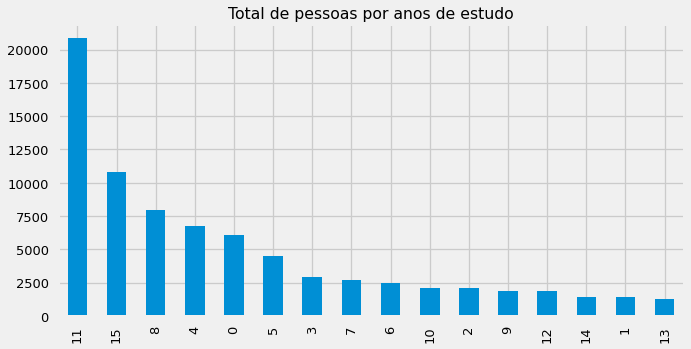

In [242]:
df['Anos de Estudo'].value_counts().plot(kind = 'bar', figsize = (10, 5))
plt.title('Total de pessoas por anos de estudo')

### Análise da variável Renda

In [194]:
df['Renda'].value_counts()

788      6881
1500     4567
1200     4476
2000     4233
1000     4158
         ... 
15781       1
1442        1
1378        1
21800       1
7388        1
Name: Renda, Length: 1606, dtype: int64

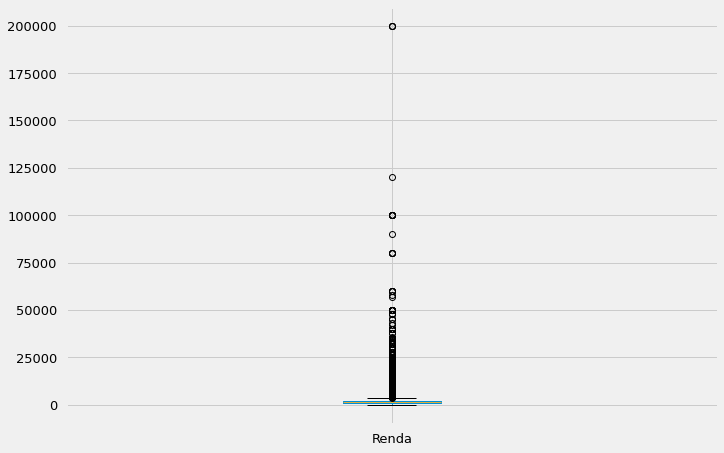

In [195]:
df.boxplot(['Renda'])

In [196]:
print("Pessoas com Renda < 20 k:", len(df["Renda"][df["Renda"] < 20000]))
print("Pessoas com Renda > 20 k:", len(df["Renda"][df["Renda"] > 20000]))
print("Pessoas com Renda > 40 k:", len(df["Renda"][df["Renda"] > 40000]))

print("\nRenda Média:", round(df['Renda'].mean(), 2))
print("Renda Máxima:", df["Renda"].max())
print("Renda Mínima:", df["Renda"].min())

Pessoas com Renda < 20 k: 76420
Pessoas com Renda > 20 k: 259
Pessoas com Renda > 40 k: 41

Renda Média: 2000.38
Renda Máxima: 200000
Renda Mínima: 0


Text(0.5, 1.0, 'Frequência de Rendas (<5k)')

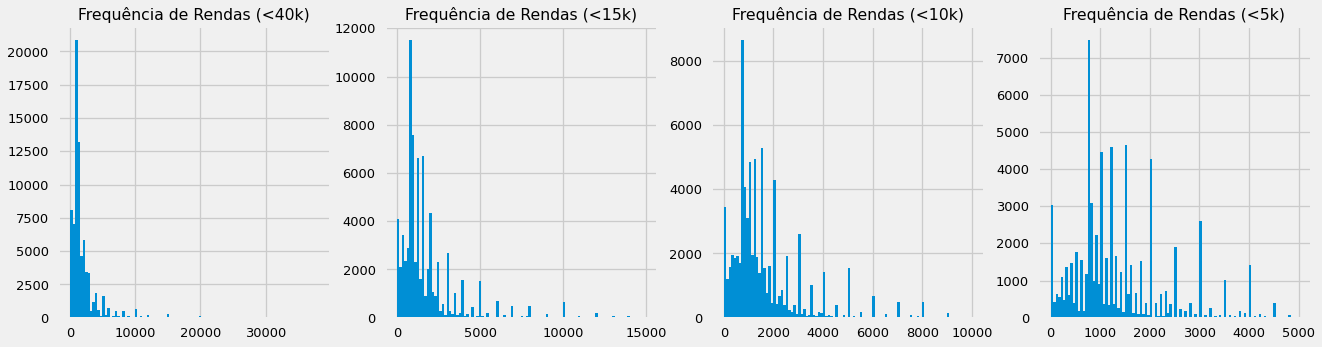

In [197]:
# Histograma plot com zoom

plt.style.use('seaborn-talk')
fig, ax = plt.subplots(1, 4, figsize = (20, 5))

ax[0].hist(df["Renda"][df["Renda"] < 40000], bins = 100)
ax[0].set_title('Frequência de Rendas (<40k)')

ax[1].hist(df["Renda"][df["Renda"] < 15000], bins = 100)
ax[1].set_title('Frequência de Rendas (<15k)')

ax[2].hist(df["Renda"][df["Renda"] < 10000], bins = 100)
ax[2].set_title('Frequência de Rendas (<10k)')

ax[3].hist(df["Renda"][df["Renda"] < 5000], bins = 100)
ax[3].set_title('Frequência de Rendas (<5k)')

### **Anáseli Bivariada**

### Anos de Estudo por Cor

Text(0.5, 1.0, 'Anos de Estudo x Cor')

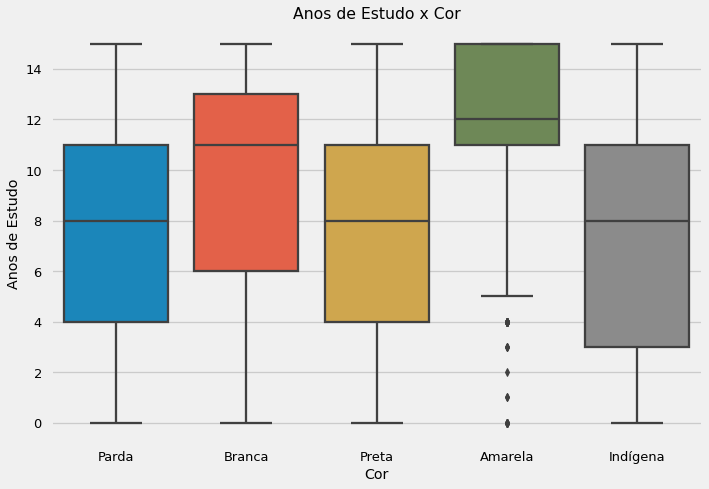

In [198]:
sns.boxplot(x = df['Cor'], y = df['Anos de Estudo'], data = df)
plt.title('Anos de Estudo x Cor')

### Anos de Estudo por Sexo

Text(0.5, 1.0, 'Anos de Estudo x Sexo')

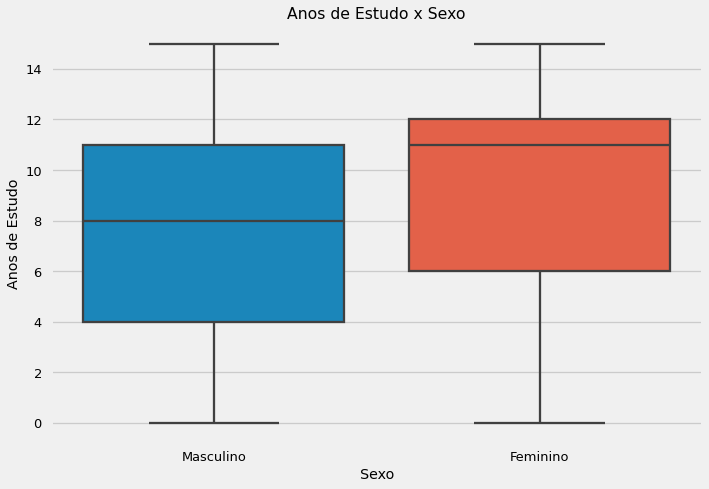

In [199]:
sns.boxplot(x = df['Sexo'], y = df['Anos de Estudo'], data = df)
plt.title('Anos de Estudo x Sexo')

### Anos de Estudo por UF

Text(0.5, 1.0, 'Média dos Anos de Estudo por UF')

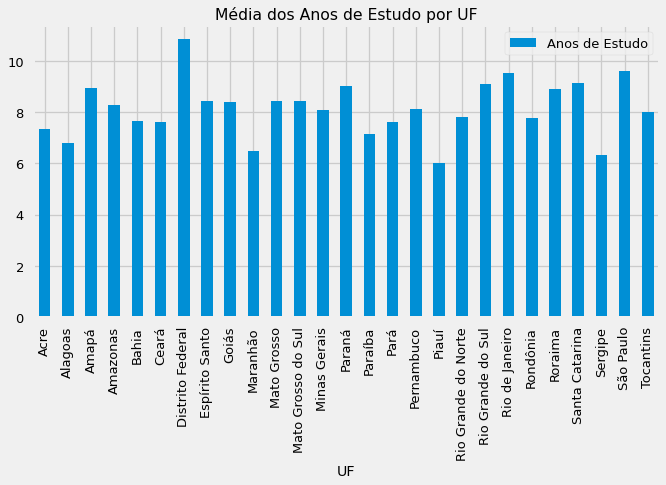

In [243]:
df.groupby('UF').mean()[['Anos de Estudo']].plot(kind = 'bar', figsize = (10, 5))
plt.title('Média dos Anos de Estudo por UF')

### Renda por Cor

Text(0.5, 1.0, 'Renda (<5k) x Cor')

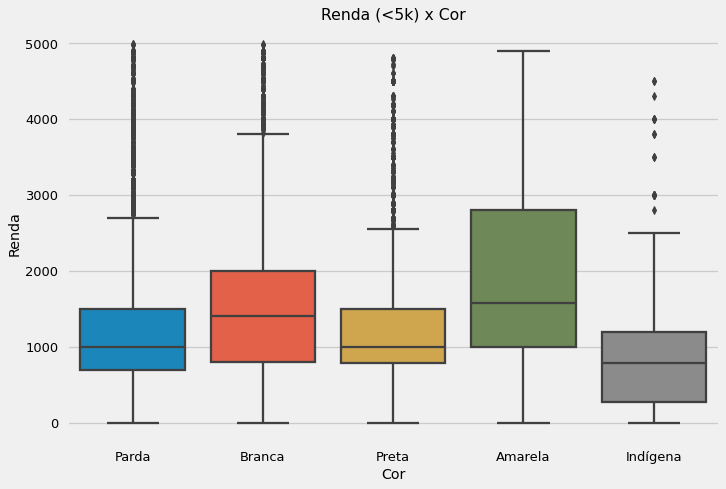

In [201]:
# Renda (<5000) por Cor

sns.boxplot(x = df['Cor'], y = df['Renda'][df['Renda'] < 5000], data = df[df['Renda'] < 5000])
plt.title('Renda (<5k) x Cor')

In [202]:
renda_media5 = (df['Renda'][df['Renda'] < 5000].sum()) / len(df['Renda'][df['Renda'] < 5000])
print('A renda média da população com renda inferior a R$5.000,00 é:', round(renda_media5, 2))

A renda média da população com renda inferior a R$5.000,00 é: 1348.92


Text(0.5, 1.0, 'Renda (>25k) x Cor')

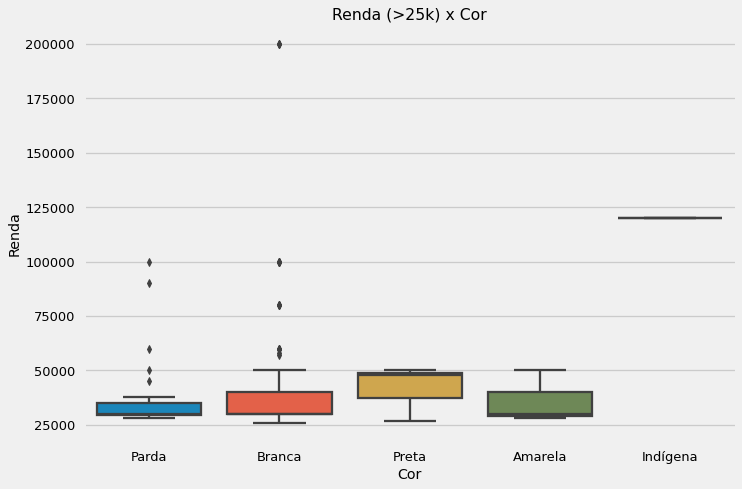

In [203]:
# Renda (>25000) por Cor

sns.boxplot(x = df['Cor'], y = df['Renda'][df['Renda'] > 25000], data = df[df['Renda'] > 25000])
plt.title('Renda (>25k) x Cor')

In [204]:
renda_media25 = (df['Renda'][df['Renda'] > 25000].sum()) / len(df['Renda'][df['Renda'] > 25000])
print('A renda média da população com renda superior a R$25.000,00 é:', round(renda_media25, 2))

A renda média da população com renda superior a R$25.000,00 é: 41720.71


### Renda por Sexo

Text(0.5, 1.0, 'Renda (>25k) x Sexo')

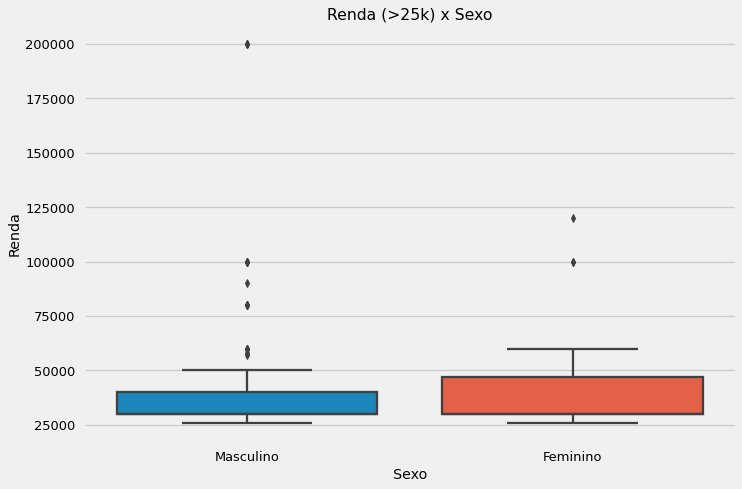

In [205]:
sns.boxplot(x = df['Sexo'], y = df['Renda'][df['Renda'] > 25000], data = df[df['Renda'] > 25000])
plt.title('Renda (>25k) x Sexo')

Text(0.5, 1.0, 'Renda (<10k) x Sexo')

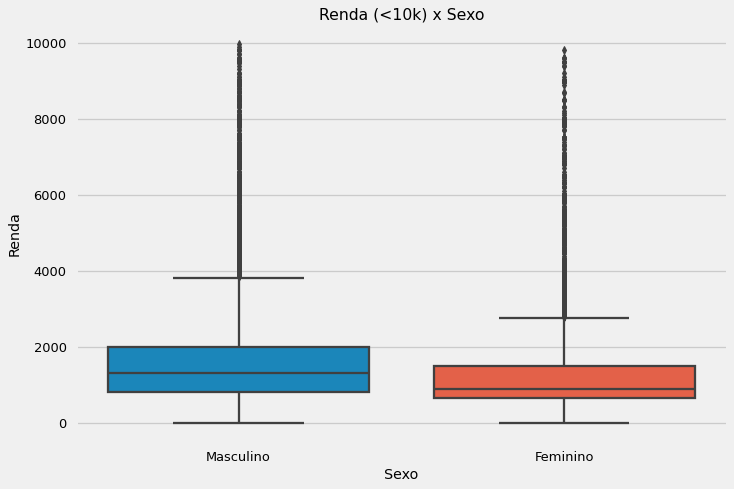

In [206]:
sns.boxplot(x = df['Sexo'], y = df['Renda'][df['Renda'] < 10000], data = df[df['Renda'] < 10000])
plt.title('Renda (<10k) x Sexo')

Text(0.5, 1.0, 'Renda (<5k) x Sexo')

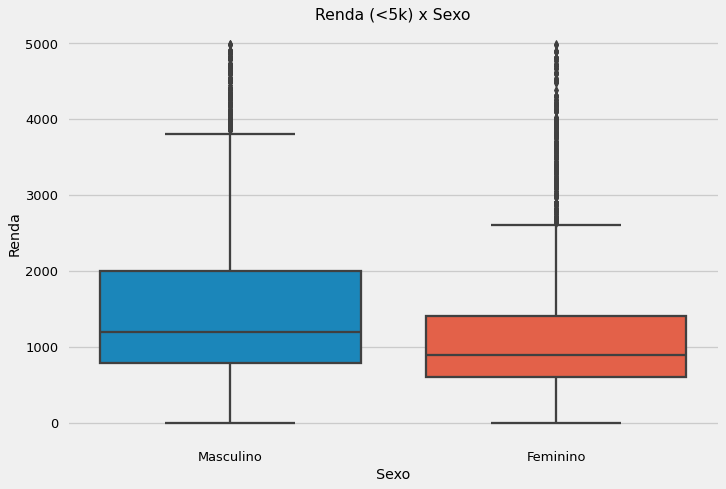

In [207]:
sns.boxplot(x = df['Sexo'], y = df['Renda'][df['Renda'] < 5000], data = df[df['Renda'] < 5000])
plt.title('Renda (<5k) x Sexo')

De acordo com as figura sugere-se que a variável sexo apresenta comportamento de rendas distintas para os grupos com renda superior a 25k (mulheres têm renda superior aos homens) e com renda inferior a 5k (homens têm renda superior ás mulheres).

In [208]:
df.groupby(['Sexo'])['Renda'].mean().round(2)

Sexo
Feminino     1566.85
Masculino    2192.44
Name: Renda, dtype: float64

In [209]:
df.groupby(['Sexo', 'Cor'])['Renda'].mean().round(2)

Sexo       Cor     
Feminino   Amarela     3027.34
           Branca      2109.87
           Indígena    2464.39
           Parda       1176.76
           Preta       1134.60
Masculino  Amarela     4758.25
           Branca      2925.74
           Indígena    1081.71
           Parda       1659.58
           Preta       1603.86
Name: Renda, dtype: float64

### Renda por Idade

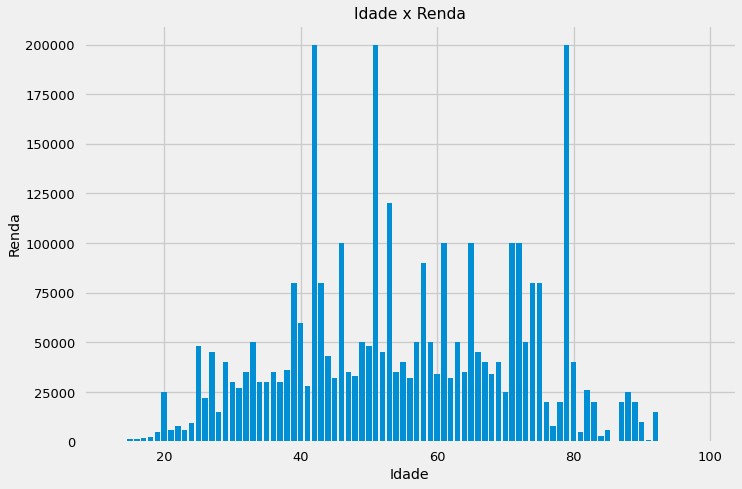

In [211]:
plt.bar(df['Idade'], df['Renda'])
plt.xlabel('Idade')
plt.ylabel('Renda')
plt.title('Idade x Renda')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Renda x Idade x Cor')

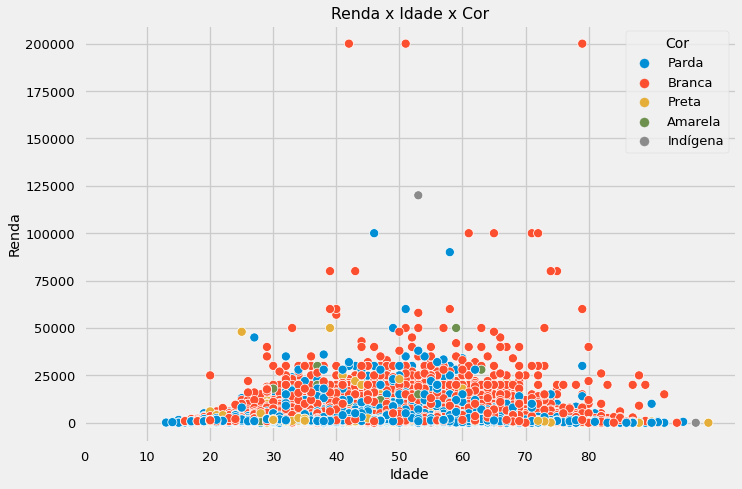

In [212]:
sns.scatterplot(df['Idade'], df['Renda'], data = df, hue = df['Cor'])
plt.xticks([0, 10, 20, 30, 40, 50, 60, 70, 80], labels = [0, 10, 20, 30, 40, 50, 60, 70, 80])
plt.title("Renda x Idade x Cor")

### Renda por Anos de Estudo

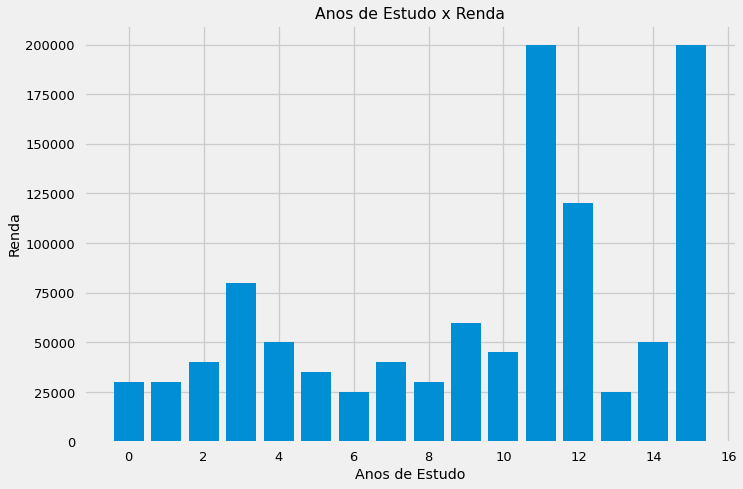

In [213]:
plt.bar(df['Anos de Estudo'], df['Renda'])
plt.xlabel('Anos de Estudo')
plt.ylabel('Renda')
plt.title('Anos de Estudo x Renda')
plt.show()

In [215]:
ate_5anos = df[df["Anos de Estudo"] <= 5]
entre6_9anos = df[(df["Anos de Estudo"] > 5) & (df["Anos de Estudo"] < 10)]
entre10_14anos = df[(df["Anos de Estudo"] >= 10) & (df["Anos de Estudo"] < 15)]
mais_15anos = df[df["Anos de Estudo"] >= 15]

print("Renda média das pessoas com até 5 anos de estudo:", round(ate_5anos['Renda'].mean(), 2))
print("Renda média das pessoas com 6 a 9 anos de estudo:", round(entre6_9anos['Renda'].mean(), 2))
print("Renda média das pessoas com 10 a 14 anos de estudo:", round(entre10_14anos['Renda'].mean(), 2))
print("Renda média das pessoas com 15 anos de estudo ou mais:", round(mais_15anos['Renda'].mean(), 2))

Renda média das pessoas com até 5 anos de estudo: 984.49
Renda média das pessoas com 6 a 9 anos de estudo: 1370.89
Renda média das pessoas com 10 a 14 anos de estudo: 1943.51
Renda média das pessoas com 15 anos de estudo ou mais: 5242.44


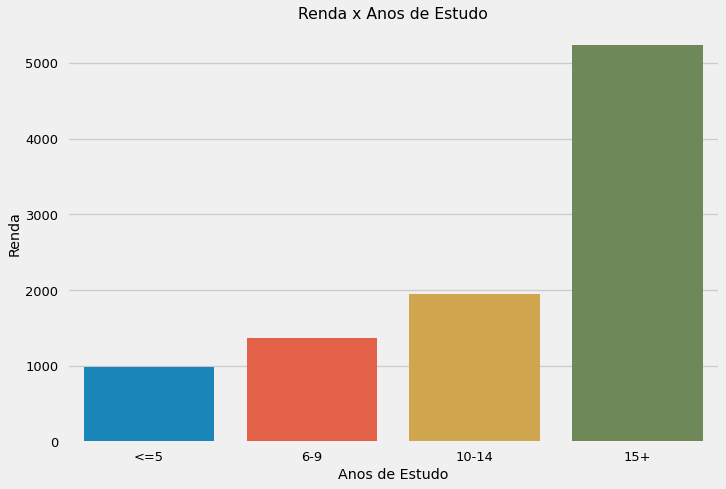

In [218]:
year_avgs = np.array([
    round(ate_5anos['Renda'].mean(), 2),
    round(entre6_9anos['Renda'].mean(), 2),
    round(entre10_14anos['Renda'].mean(), 2),
    round(mais_15anos['Renda'].mean(), 2)
    ])

categorias = np.array(['<=5', '6-9', '10-14', '15+'])

sns.barplot(x=categorias, y=year_avgs)
plt.title("Renda x Anos de Estudo")
plt.xlabel('Anos de Estudo')
plt.ylabel('Renda')
plt.show()

### Renda por UF

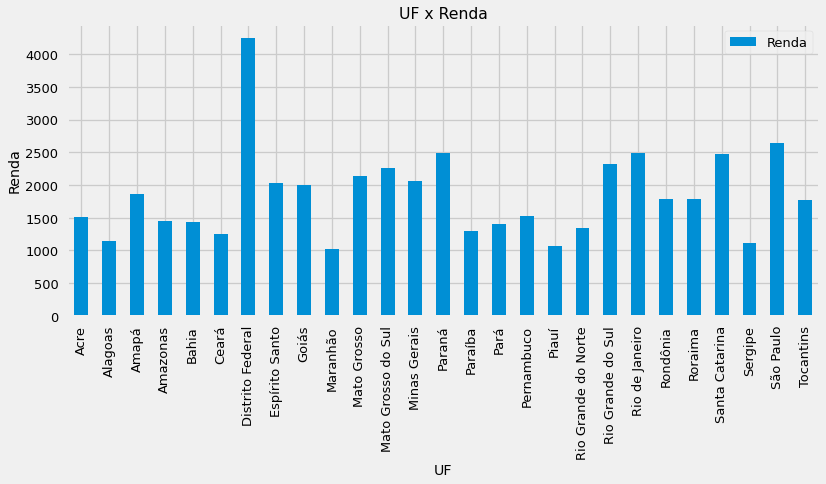

In [222]:
df.groupby('UF').mean()[['Renda']].plot(kind='bar', figsize = (12, 5))
plt.title('UF x Renda')
plt.xlabel('UF')
plt.ylabel('Renda')
plt.show()

### Anos de Estudo por Idade

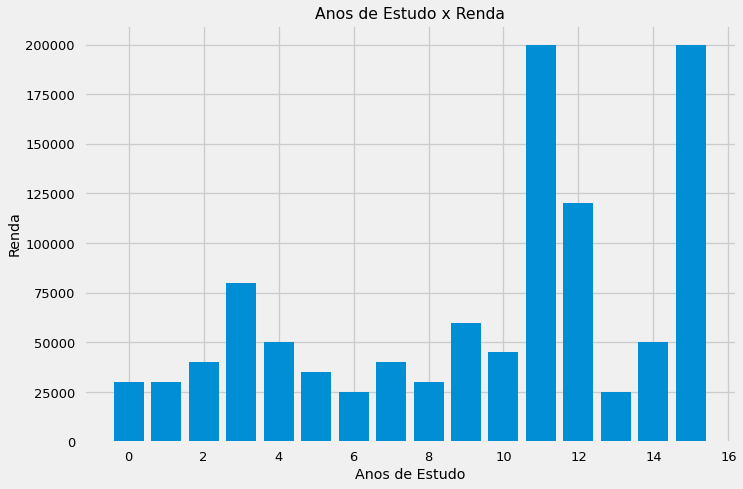

In [221]:
plt.bar(df['Anos de Estudo'], df['Renda'])
plt.xlabel('Anos de Estudo')
plt.ylabel('Renda')
plt.title('Anos de Estudo x Renda')
plt.show()

### Anos de Estudo por Cor

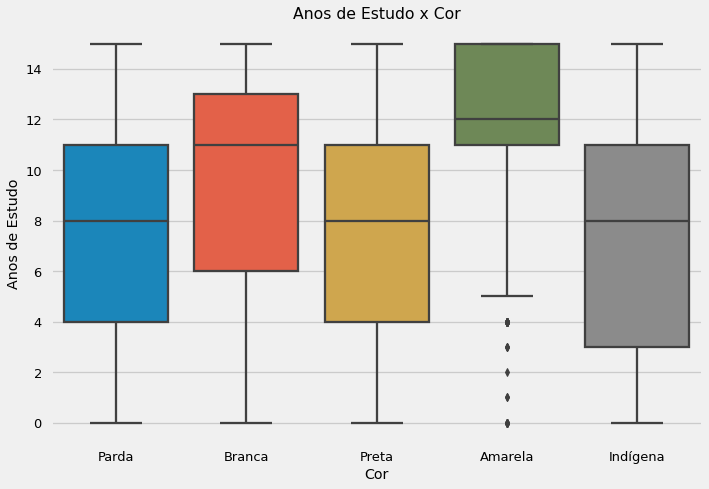

In [223]:
sns.boxplot(x = df['Cor'], y = df['Anos de Estudo'], data = df)
plt.title("Anos de Estudo x Cor")

fig = plt.gcf()
plt.show()
#fig.savefig('teste.png', format='png')

### Anos de Estudo por Sexo

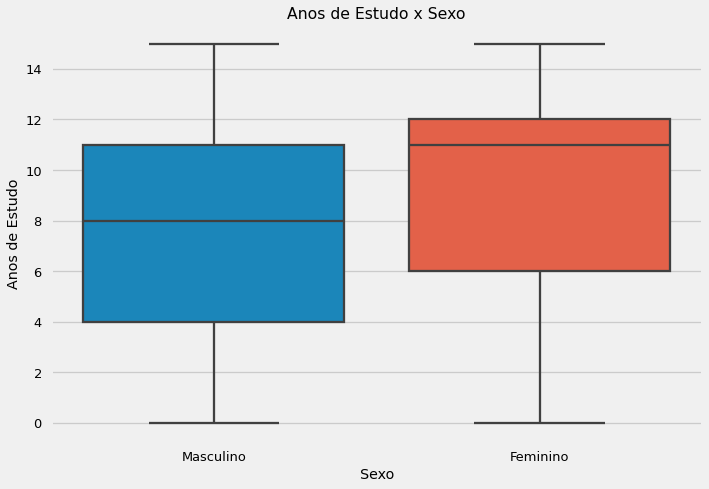

In [224]:
sns.boxplot(x = df['Sexo'], y = df['Anos de Estudo'], data = df)
plt.title("Anos de Estudo x Sexo")
plt.show()
#plt.savefig('teste1.png', format='png')

### Anos de Estudo por UF

Text(0.5, 1.0, 'Anos de Estudo x UF')

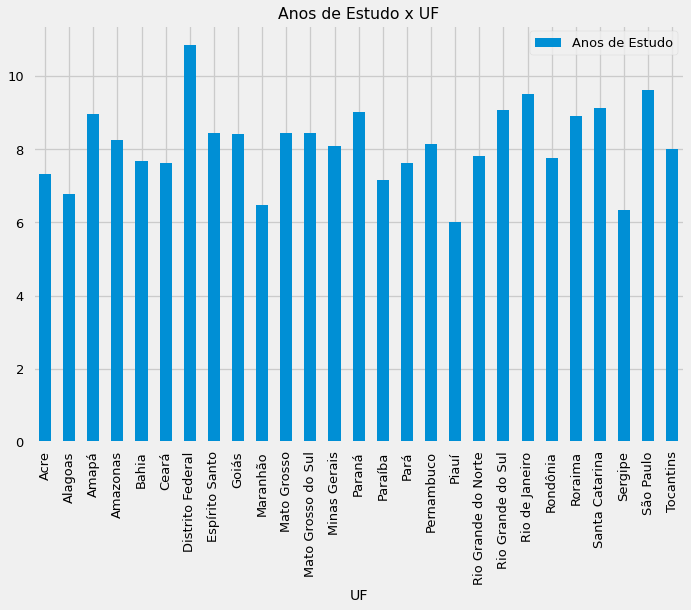

In [225]:
df.groupby('UF').mean()[['Anos de Estudo']].plot(kind='bar')
plt.title("Anos de Estudo x UF")

### Altura por Sexo

Text(0.5, 1.0, 'Altura x Sexo')

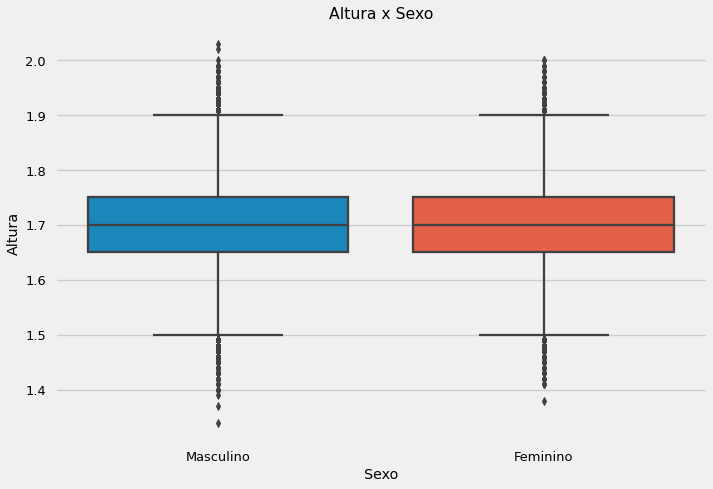

In [226]:
sns.boxplot(x = df['Sexo'], y = df['Altura'])
plt.title("Altura x Sexo")

In [228]:
print('Altura média dos homens:', round(df[df['Sexo'] == "Masculino"].Altura.mean(), 2))
print('Altura média dos mulheres:', round(df[df['Sexo'] == "Feminino"].Altura.mean(), 2))

Altura média dos homens: 1.7
Altura média dos mulheres: 1.7


### **Análise de correlação entre as variáveis**

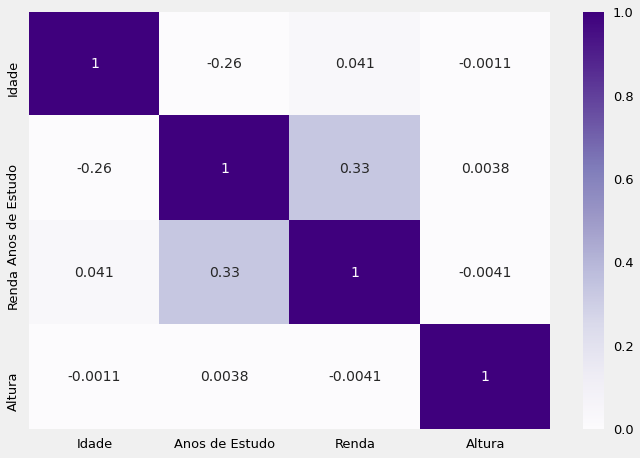

In [229]:
corr = df.corr()
sns.heatmap(corr, annot = True, vmin = 0, vmax = 1, cmap = 'Purples')

In [230]:
corr = df.corr()
corr.style.background_gradient()

,Idade,Anos de Estudo,Renda,Altura
Idade,1.000000,-0.263370,0.041357,-0.001148
Anos de Estudo,-0.263370,1.000000,0.334309,0.003807
Renda,0.041357,0.334309,1.000000,-0.004126
Altura,-0.001148,0.003807,-0.004126,1.000000


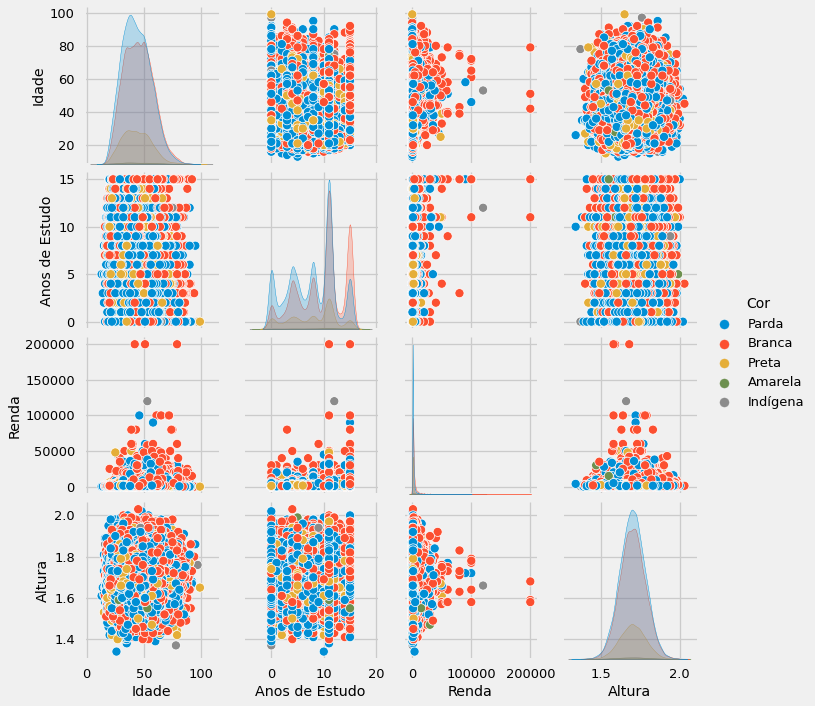

In [231]:
sns.pairplot(df, hue = 'Cor')

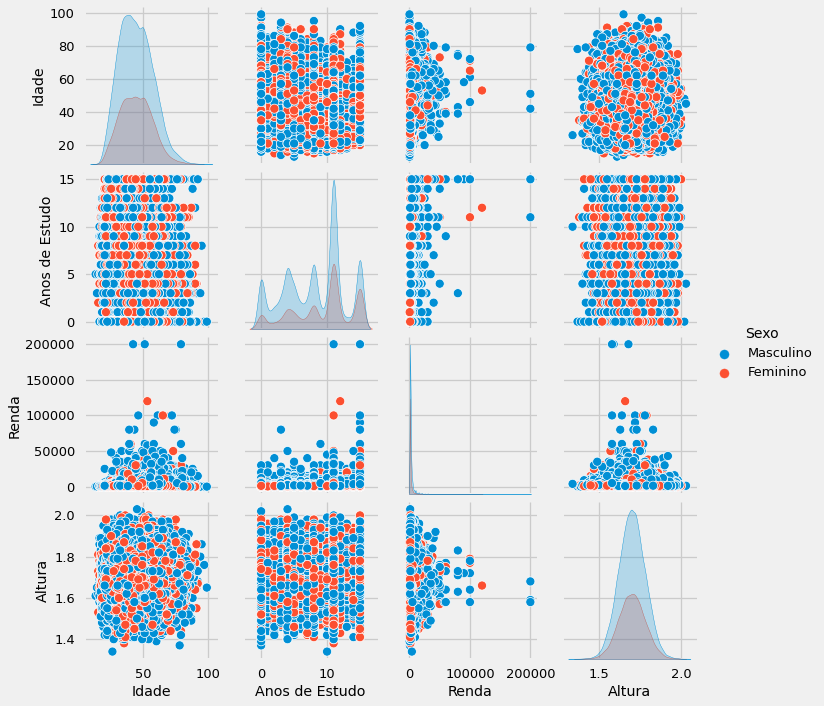

In [232]:
sns.pairplot(df, hue = 'Sexo')

### **Referências**

https://www.kaggle.com/simoneassis/unb-gpp-lab-a5-pnad-2015/notebook  
https://www.kaggle.com/hinepo/pnad-data-analysis-and-salary-prediction#Attributes-Relations
